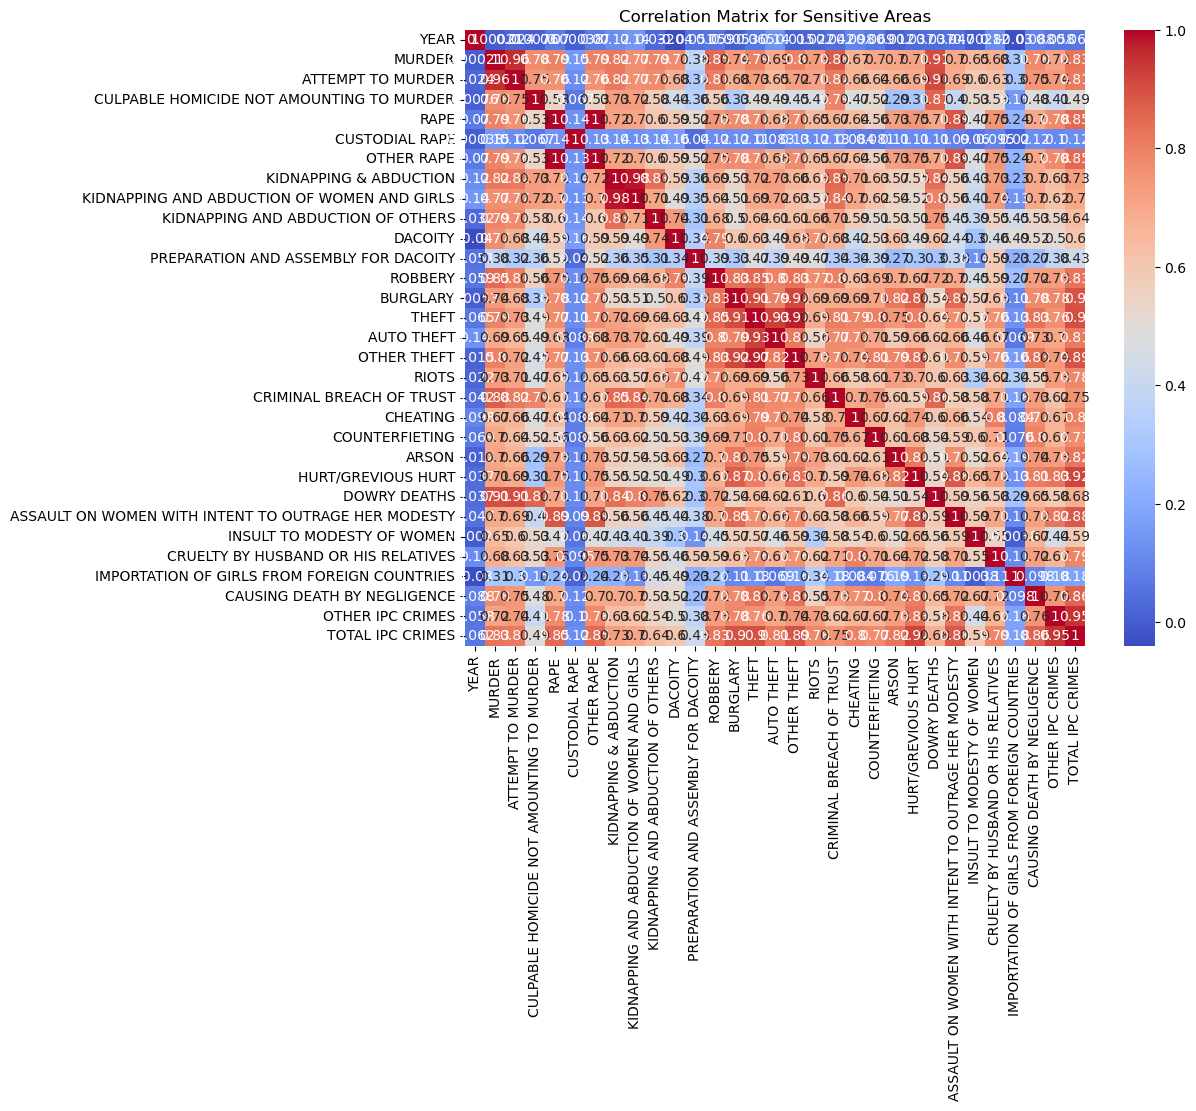

Recommendations to Reduce Crime in Sensitive Areas:
- Increase police patrolling during night hours.
- Implement community awareness and vigilance programs.
- Improve street lighting in high-crime areas.
- Encourage neighborhood watch schemes.
Most Safe District:
STATE/UT                                                       ASSAM
DISTRICT                                                      C.I.D.
YEAR                                                            2001
MURDER                                                             0
ATTEMPT TO MURDER                                                  0
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER                          0
RAPE                                                               0
CUSTODIAL RAPE                                                     0
OTHER RAPE                                                         0
KIDNAPPING & ABDUCTION                                             0
KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS   

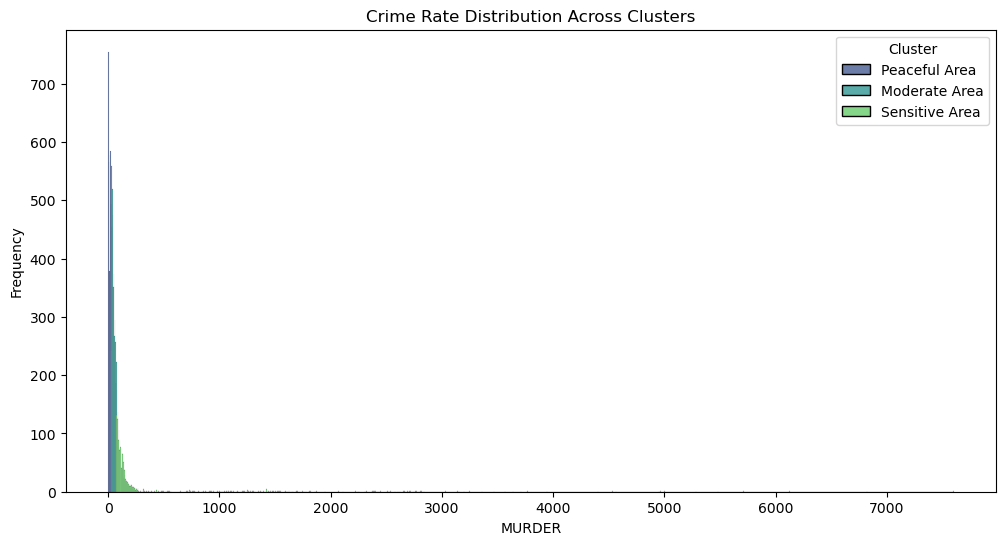

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the data
file_path = r"C:\Users\Rishav Gupta\Desktop\CAPSTONE\India_Crime - Copy\01_District_wise_crimes_committed_IPC_2001_2012.csv"
df = pd.read_csv(file_path)

# Define thresholds for clustering
sensitive_threshold = 75
moderate_threshold = 25

# Ensure 'MURDER' column exists and is numeric
if 'MURDER' in df.columns:
    df['MURDER'] = pd.to_numeric(df['MURDER'], errors='coerce')
else:
    raise KeyError("The 'MURDER' column is missing from the dataset.")

# Drop rows with NaN values in 'MURDER'
df = df.dropna(subset=['MURDER'])

# Create clusters
df['Cluster'] = pd.cut(df['MURDER'], bins=[0, moderate_threshold, sensitive_threshold, df['MURDER'].max()], 
                       labels=['Peaceful Area', 'Moderate Area', 'Sensitive Area'], include_lowest=True)

# Create separate DataFrames for each cluster
sensitive_areas = df[df['Cluster'] == 'Sensitive Area']
moderate_areas = df[df['Cluster'] == 'Moderate Area']
peaceful_areas = df[df['Cluster'] == 'Peaceful Area']

# Analysis 1: Correlation Matrix for Sensitive Areas
if not sensitive_areas.empty:
    # Select only numeric columns for correlation calculation
    numeric_cols = sensitive_areas.select_dtypes(include=[np.number])
    correlation_sensitive = numeric_cols.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_sensitive, annot=True, cmap='coolwarm')
    plt.title("Correlation Matrix for Sensitive Areas")
    plt.show()
else:
    print("No data available for Sensitive Areas to compute the correlation matrix.")

# Continue with the rest of your analysis...

# Analysis 2: Recommendations to Reduce Crime
print("Recommendations to Reduce Crime in Sensitive Areas:")
print("- Increase police patrolling during night hours.")
print("- Implement community awareness and vigilance programs.")
print("- Improve street lighting in high-crime areas.")
print("- Encourage neighborhood watch schemes.")

# Analysis 3: Most Safe and Unsafe Districts
if not peaceful_areas.empty:
    most_safe_district = peaceful_areas.loc[peaceful_areas['MURDER'].idxmin()]
    print("Most Safe District:")
    print(most_safe_district)
else:
    print("No data available for Peaceful Areas to determine the most safe district.")

if not sensitive_areas.empty:
    most_unsafe_district = sensitive_areas.loc[sensitive_areas['MURDER'].idxmax()]
    print("\nMost Unsafe District:")
    print(most_unsafe_district)
else:
    print("No data available for Sensitive Areas to determine the most unsafe district.")

# Analysis 4: Crime Rate Distribution
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='MURDER', hue='Cluster', multiple='stack', palette='viridis')
plt.title("Crime Rate Distribution Across Clusters")
plt.xlabel("MURDER")
plt.ylabel("Frequency")
plt.show()